**Задача 1. Вариант 7.**

*Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.*
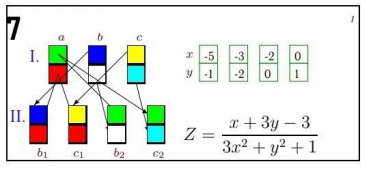

In [4]:
def qZ(x,y):
    return (x+3*y-3)/(3*x**2+y**2+1)

def qSumZ(z):
    return sum(z)

def exchangeScheme(oldX,oldY,sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X,Y

def sorting(Z):
    sortedId = sorted(range(len(Z)),key = lambda k:Z[k])
    return sortedId

def evoStep(X,Y,Z):
    _,minId = min((value,id) for (id,value) in enumerate(Z))
    X=X[:]
    Y=Y[:]
    Z=Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X,Y,Z

def evoSteps(X,Y,stepsNum=4):

    results=[]

    for i in range(4):
        arrZ = [qZ(x,Y[i]) for i,x in enumerate(X)]

        X,Y,Z = evoStep(X,Y,arrZ)
        X,Y = exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])

    return X,Y,results


X = [-5, -3, -2, 0]
Y = [-1, -2, 0, 1]

results = evoSteps(X,Y)
qualityArrZ = []

for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    print(f'max_{i+1}_step: {results[2][i][2]}')

print(f'max Z: {max(qualityArrZ)}')

max_1_step: -0.9024725274725274
max_2_step: -4.968383340797134
max_3_step: -0.34338334079713384
max_4_step: -0.1683833407971339
max Z: 0.0


**Задача 2. Вариант 7.**

*Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.*

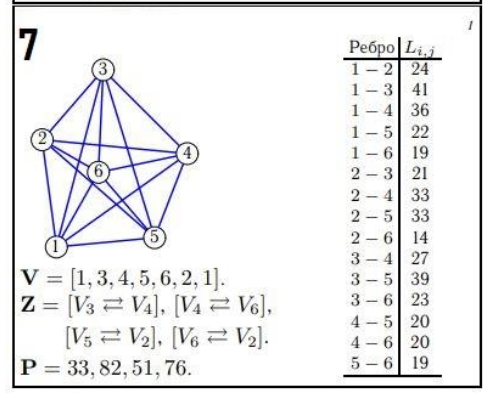

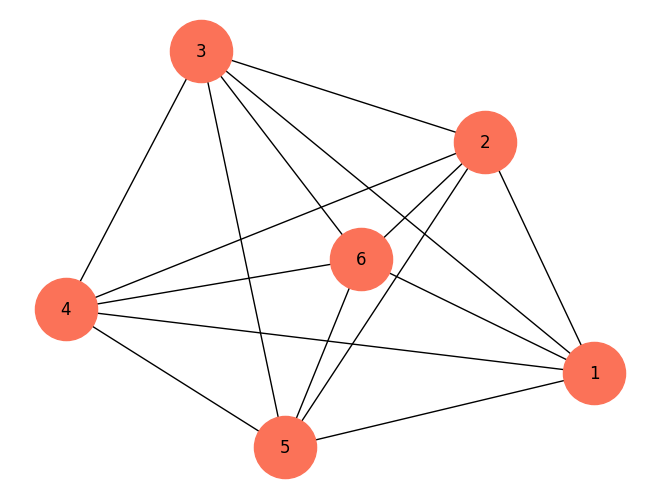

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from math import e

distances = [(1, 2, 24),
            (1, 3, 41),
            (1, 4, 36),
            (1, 5, 22),
            (1, 6, 19),
            (2, 3, 21),
            (2, 4, 33),
            (2, 5, 33),
            (2, 6, 14),
            (3, 4, 27),
            (3, 5, 39),
            (3, 6, 23),
            (4, 5, 20),
            (4, 6, 20),
            (5, 6, 19)] # Длины ребер

V = [1, 3, 4, 5, 6, 2, 1] # Последовательность прохождения маршрута

Z = [(3,4), (4,6), (5,2), (6,2)] # Последовательность замен вершин

P = [33, 82, 51, 76] # Случайные числа, выпавшие в процессе счета

T = 100 # Начальная температура

# Функция вероятности
def probability(delta,T):
    return 100*e**(-delta/T)

# Функция изменения температуры
def reductTemp(prevT):
    nexT = 0.5*prevT
    return nexT

# Построение графа
G = nx.Graph()
G.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(G, node_color='#fb7258', node_size=2000, with_labels=True)

Лучший выбранны маршрут: [1, 6, 5, 4, 3, 2, 1]
Длина лучшего выбранного маршрута: 130
Длины всех рассмотренных маршрутов: [145, 158, 183, 130, 146]


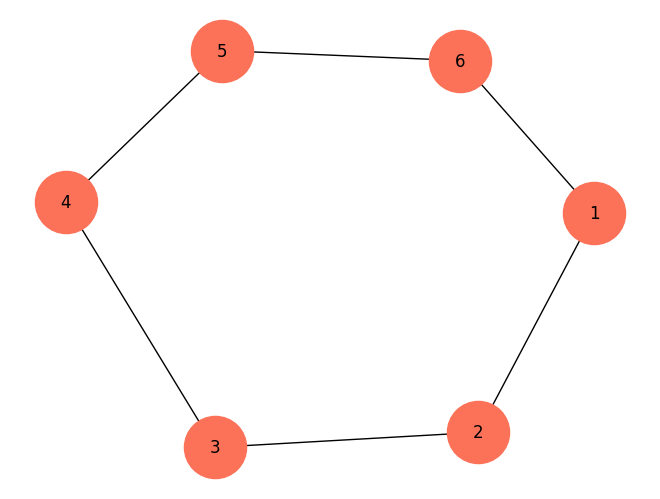

In [3]:
def edgeLength(i,j,distances,roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j) or (item[1]==i and item[0]==j) else -1)
                   for item in distances])
    else:
        return max([(item[2] if (item[0]==i and item[1]==j) else -1) for item in distances])

def routeLength(V,distances):
    edges=[]

    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)

def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement] = arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV

def routeReplacement(V,Z):
    for z in Z:
        V = routeOneReplacement(V,z)
    return V

def chooseRoute(distances,V,Z,T,P):
    sumLength=routeLength(V,distances)
    arrSum=[sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:],Z[i])
        newS = routeLength(newV,distances)
        arrSum.append(newS)
        deltaS = newS-sumLength

        if deltaS>0:
            p = probability(deltaS,T)
            if p > P[i]:
                V = newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
        T = reductTemp(T)
    return V, arrSum

def drawRouteGraph(distances,bestRoute):
    newDistances = []

    for i in range(len(bestRoute)-1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1] \
            or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
                newDistances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph,node_color='#fb7258',node_size=2000,with_labels=True)

bestRoute, arrLength = chooseRoute(distances,V,Z,T,P)

print(f'Лучший выбранны маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute,distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances,bestRoute)